In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df = df.drop(axis=1, columns=['RowNumber', 'CustomerId', 'Surname'])

In [3]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 11)

In [5]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df.isnull().values.any()

False

# EDA

In [8]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

<AxesSubplot:xlabel='Exited', ylabel='count'>

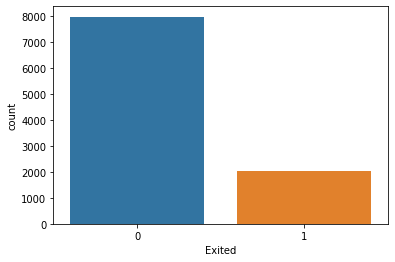

In [9]:
sns.countplot(x=df.Exited)

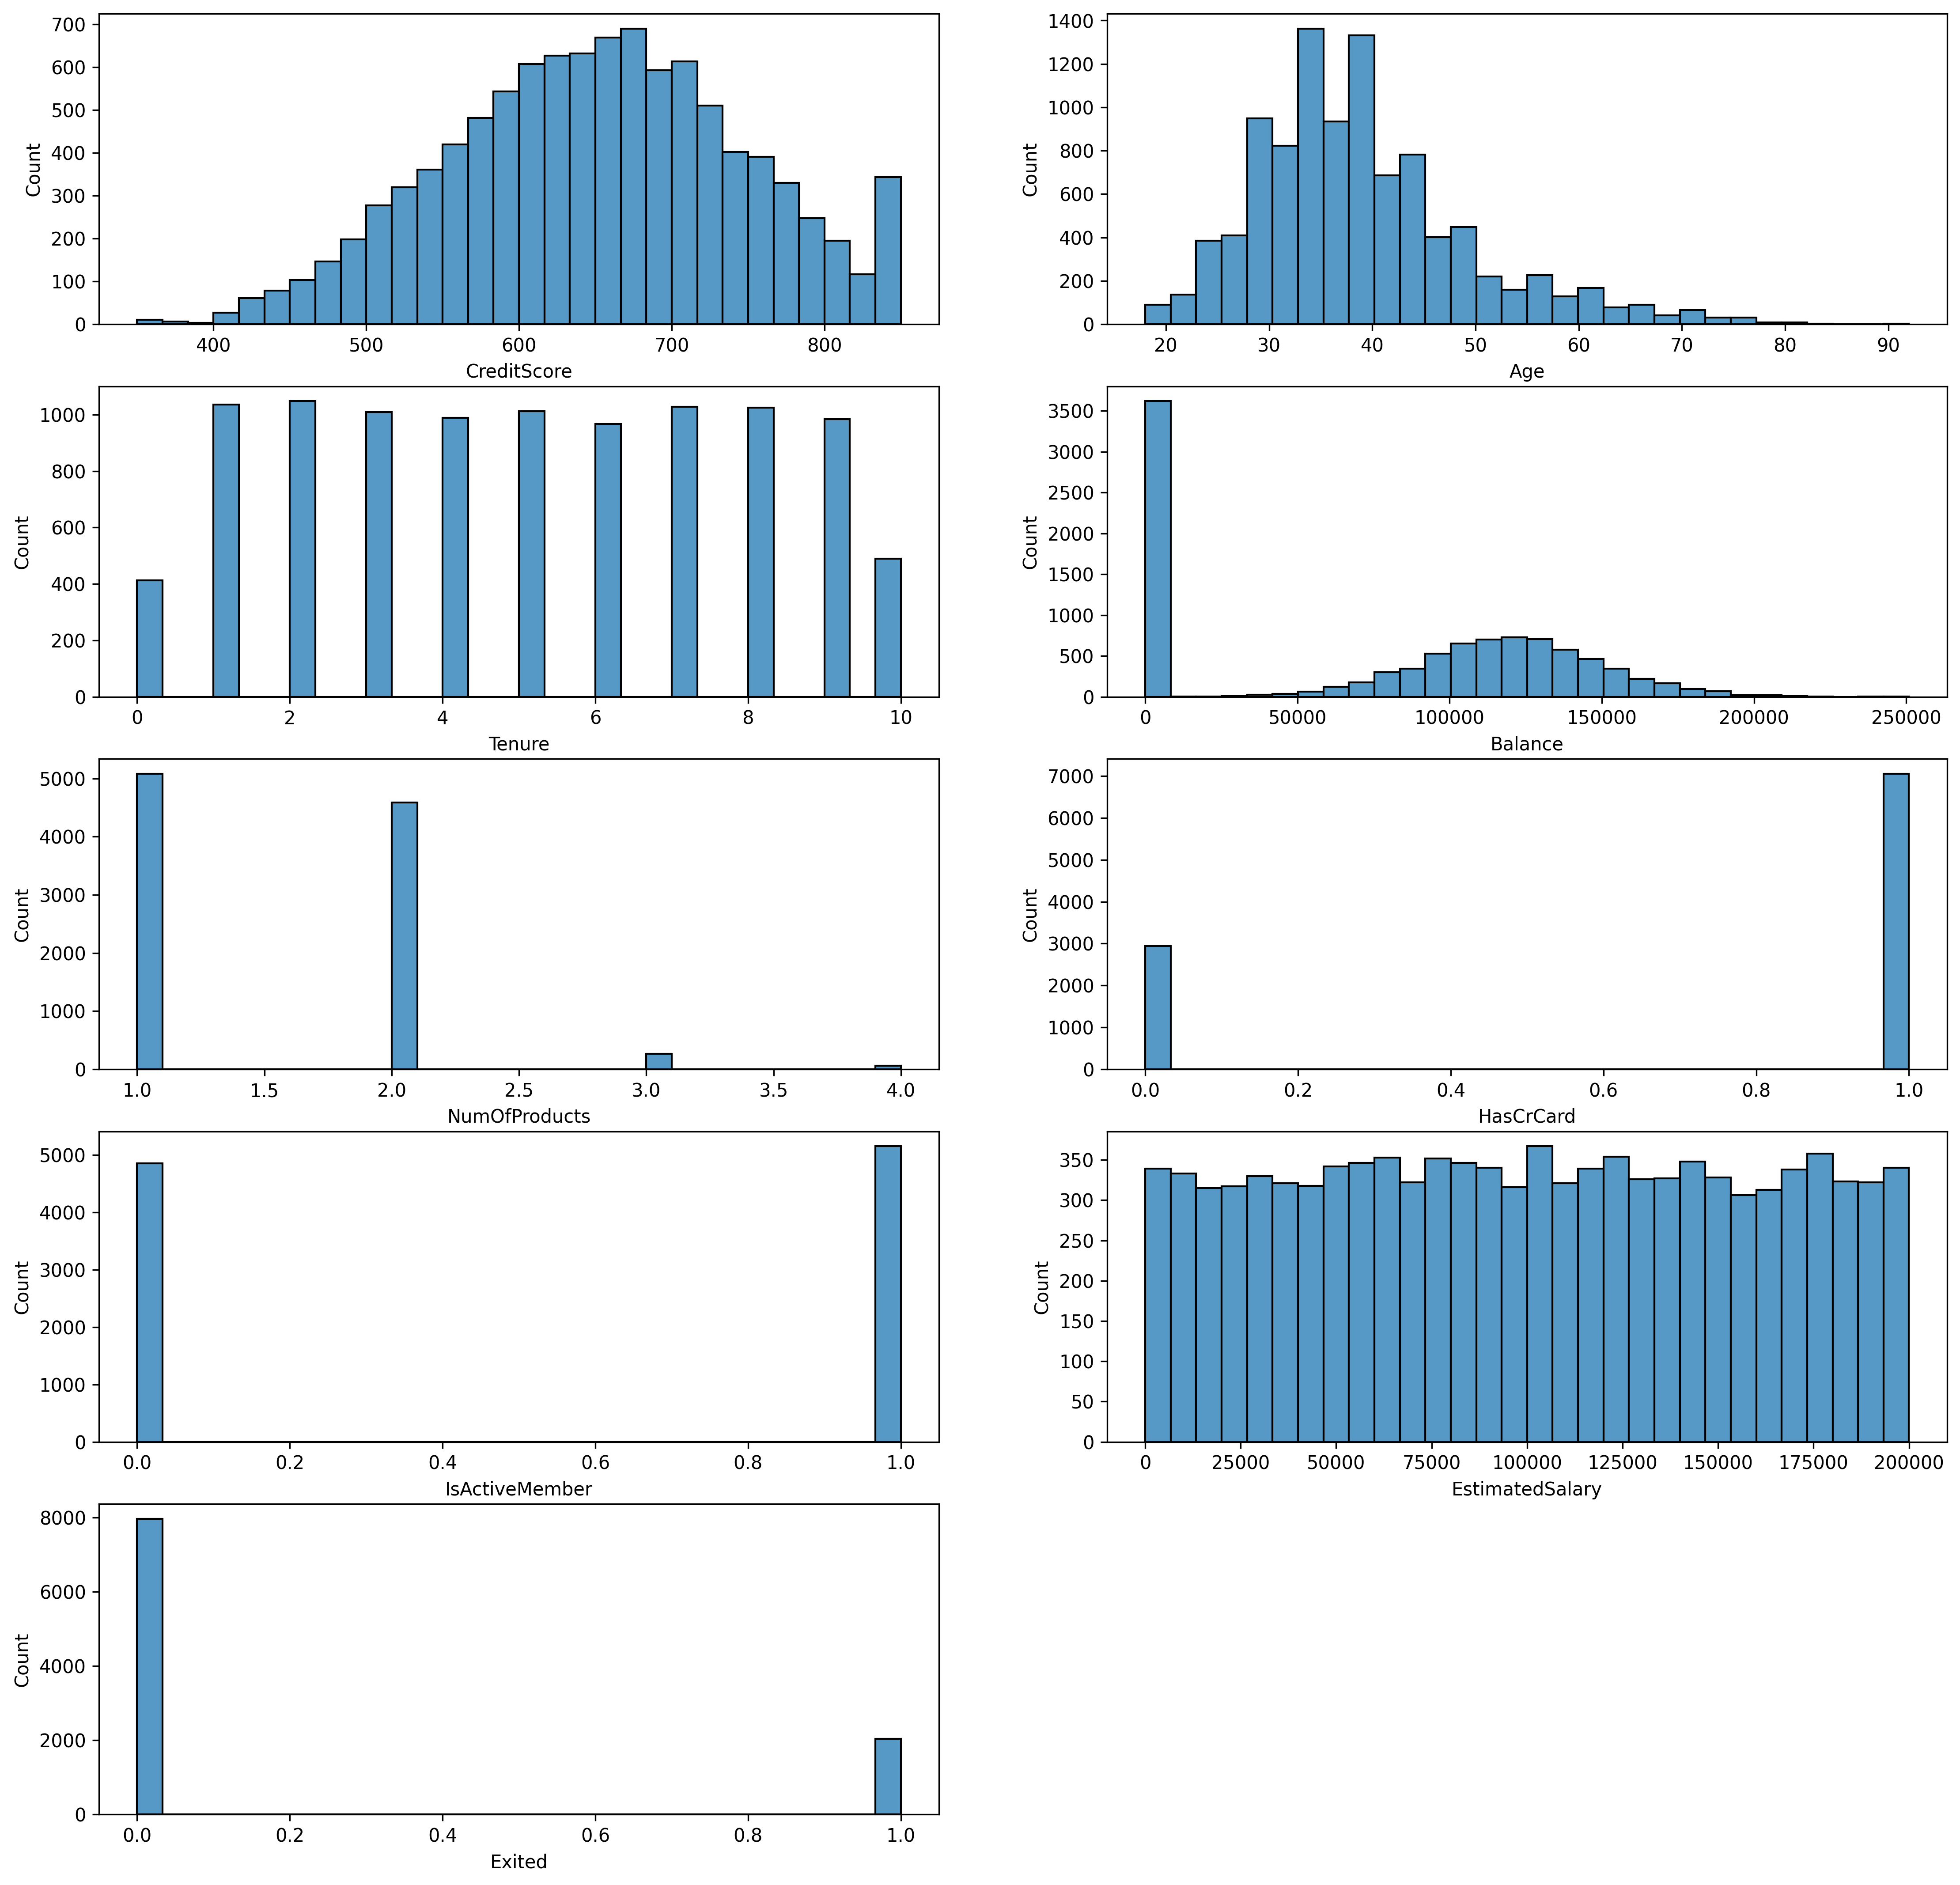

In [10]:
plt.figure(figsize=(18,18), dpi=300)
i=1
for col in ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']:
    plt.subplot(5,2,i)
    i+=1
    sns.histplot(x=df[col], bins=30)

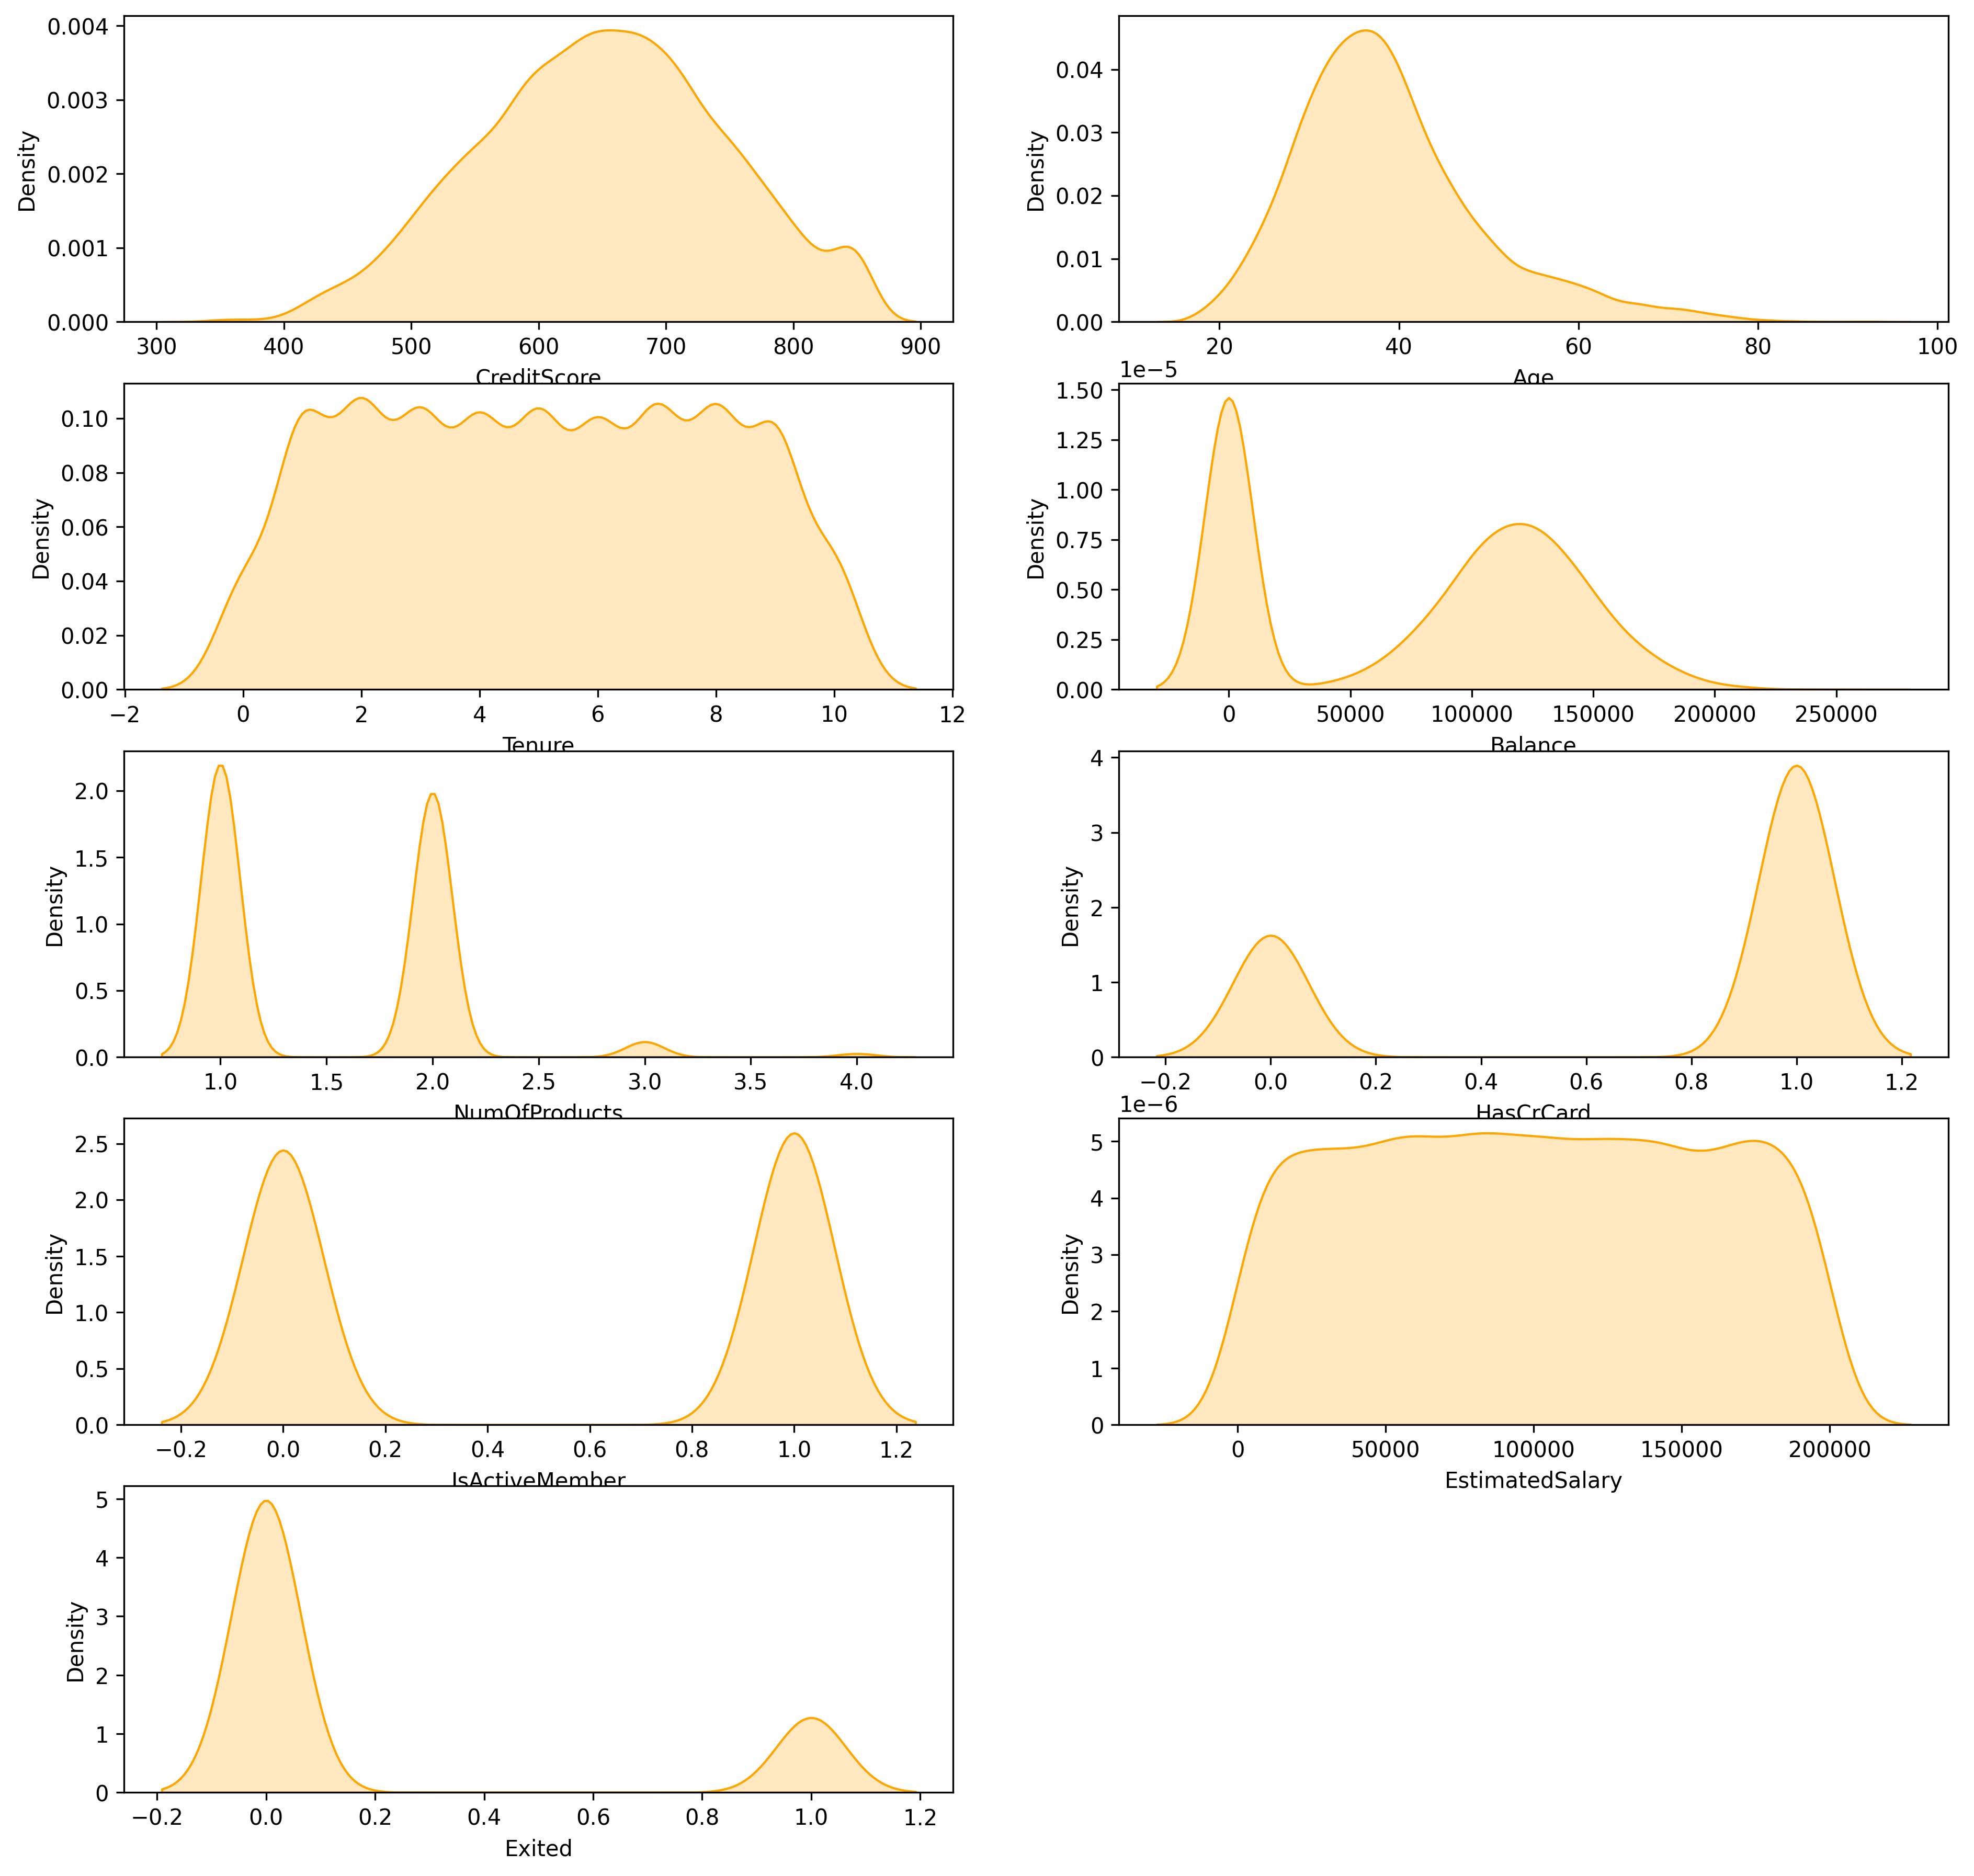

In [11]:
plt.figure(figsize=(15,15), dpi=300)
i=1
for col in ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']:
    plt.subplot(5,2,i)
    i+=1
    sns.kdeplot(x=df[col], shade=True, color='orange')

In [12]:
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:xlabel='Gender', ylabel='count'>

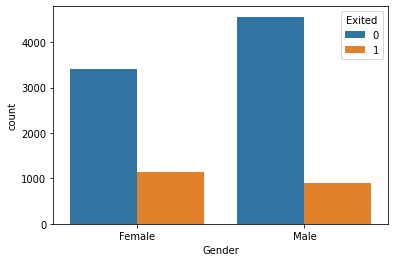

In [14]:
sns.countplot(x=df.Gender, hue=df.Exited)

<AxesSubplot:xlabel='Geography', ylabel='count'>

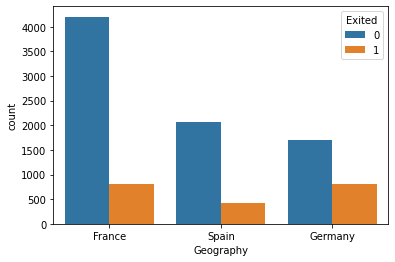

In [15]:
sns.countplot(x=df.Geography, hue=df.Exited)

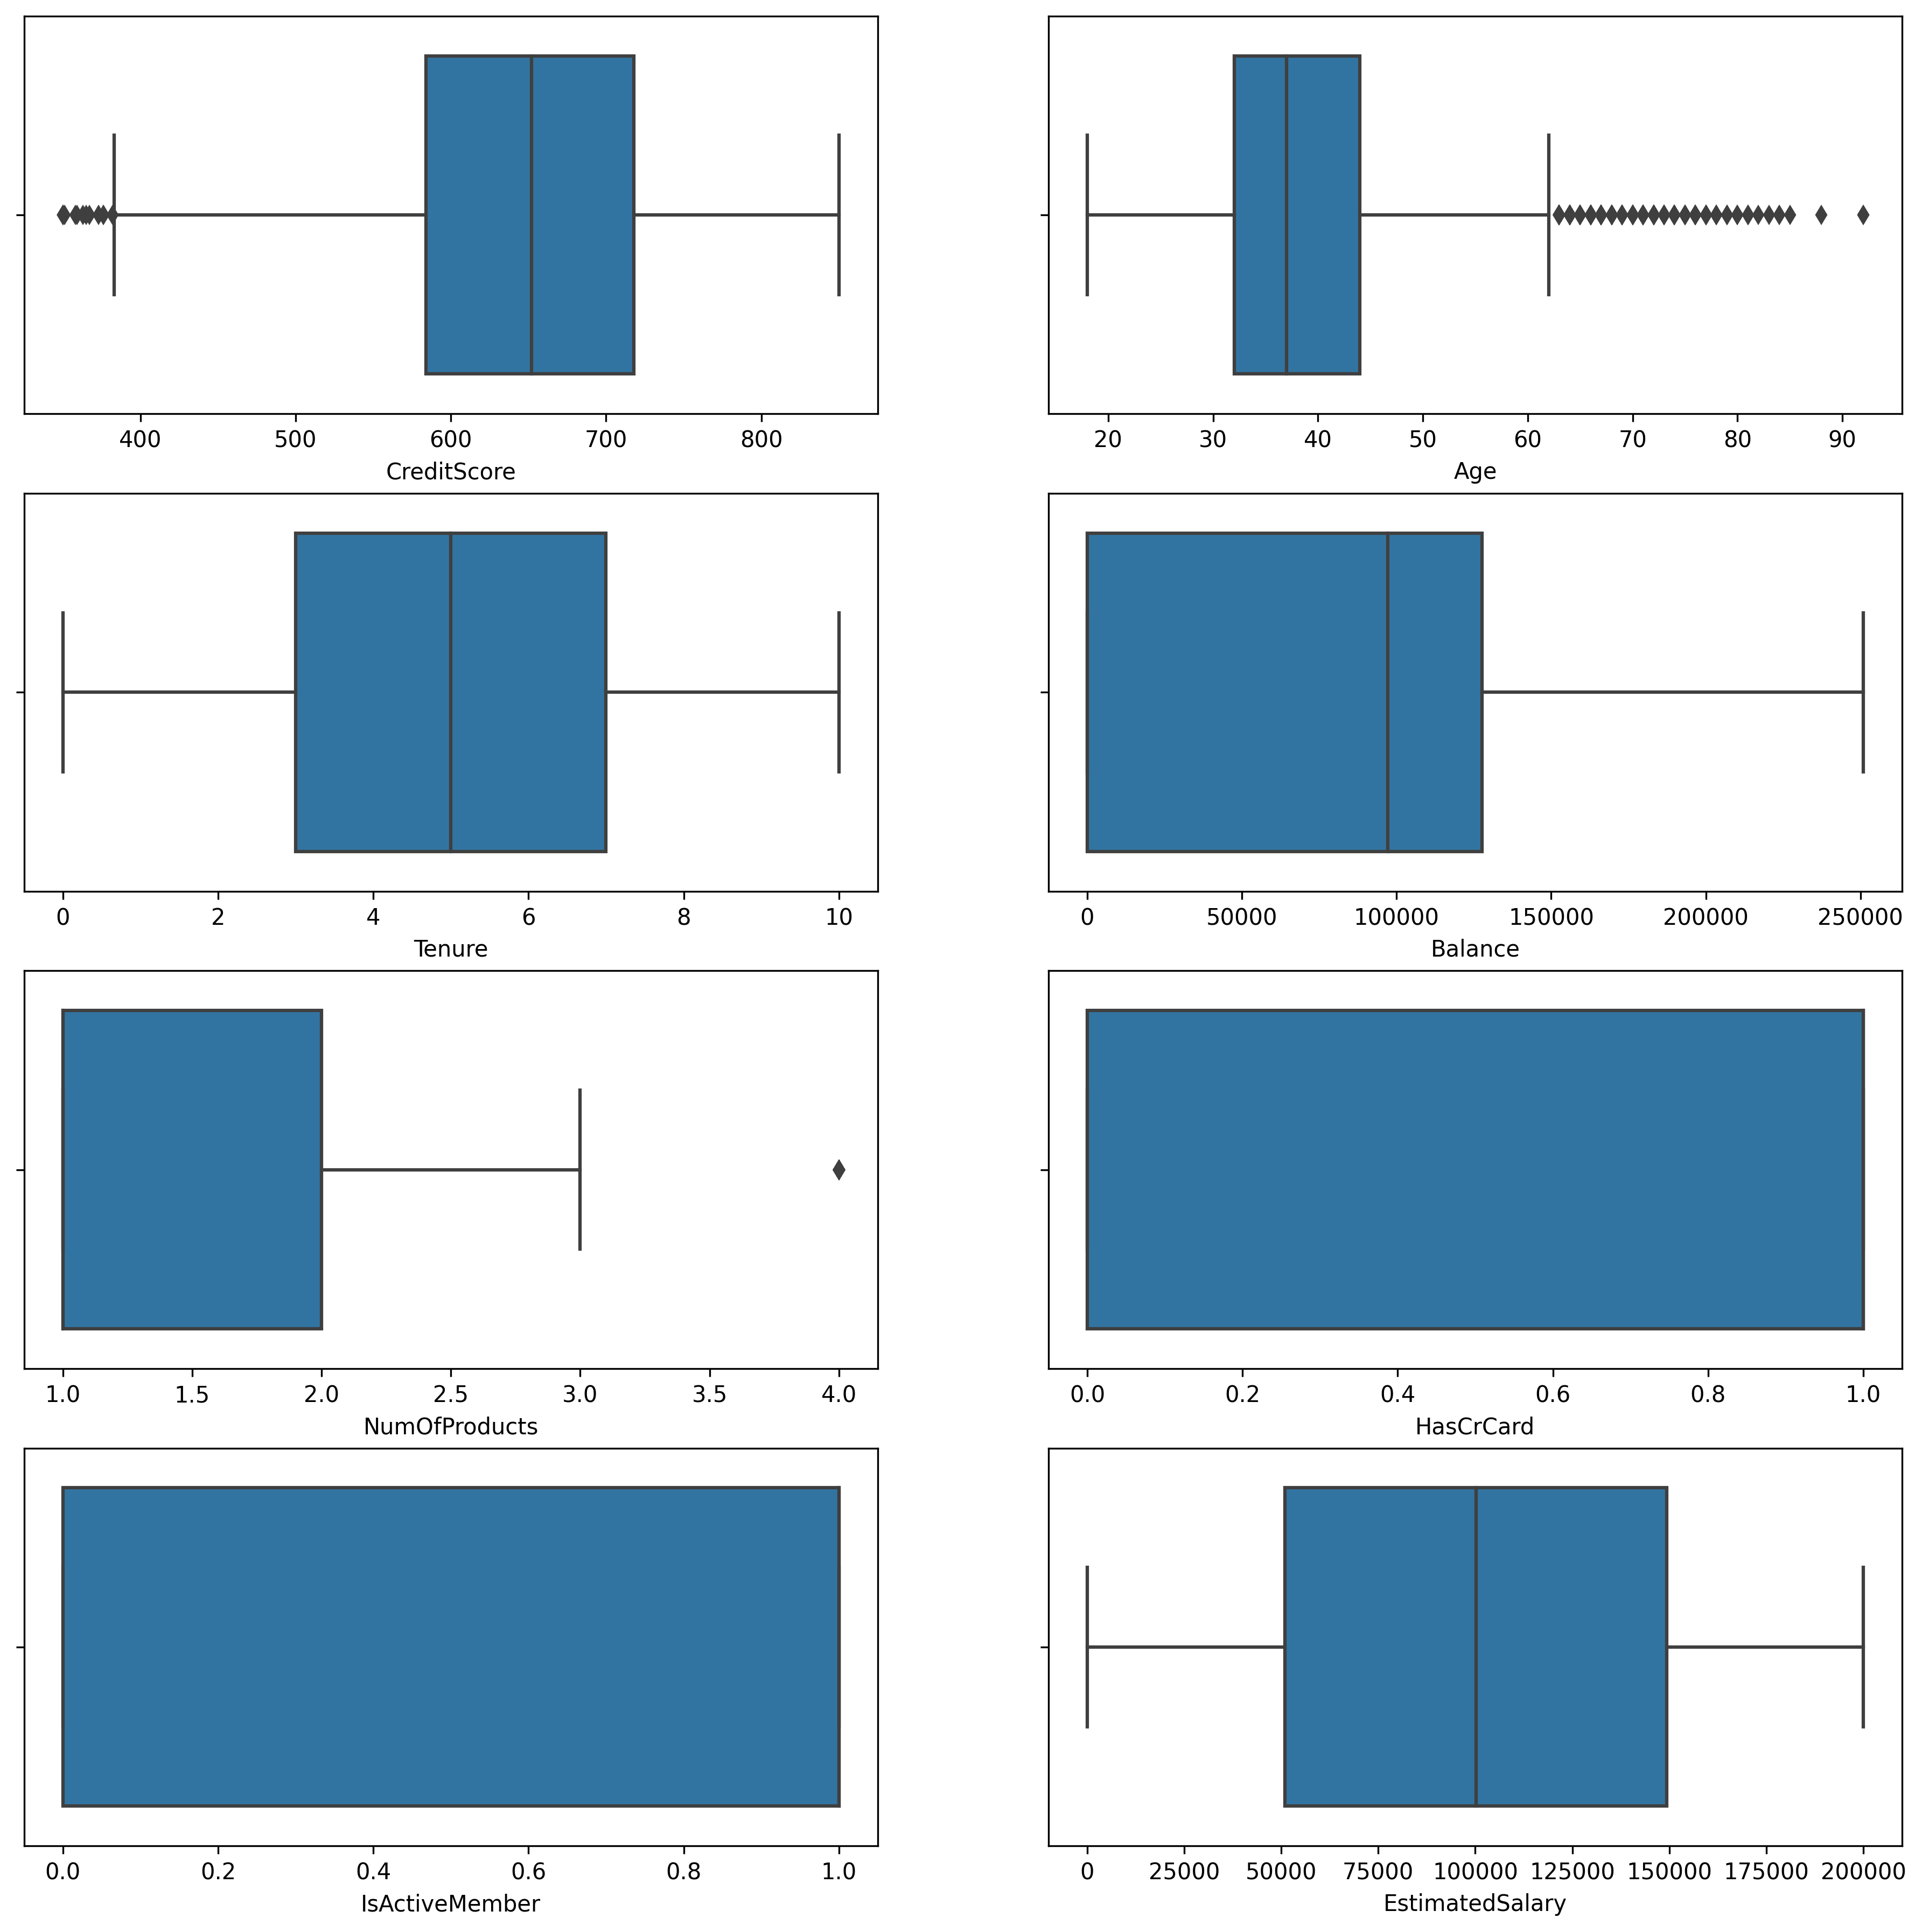

In [16]:
plt.figure(figsize=(15,15), dpi=300)
i=1
for col in ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']:
    plt.subplot(4,2,i)
    i+=1
    sns.boxplot(x=df[col])

<AxesSubplot:>

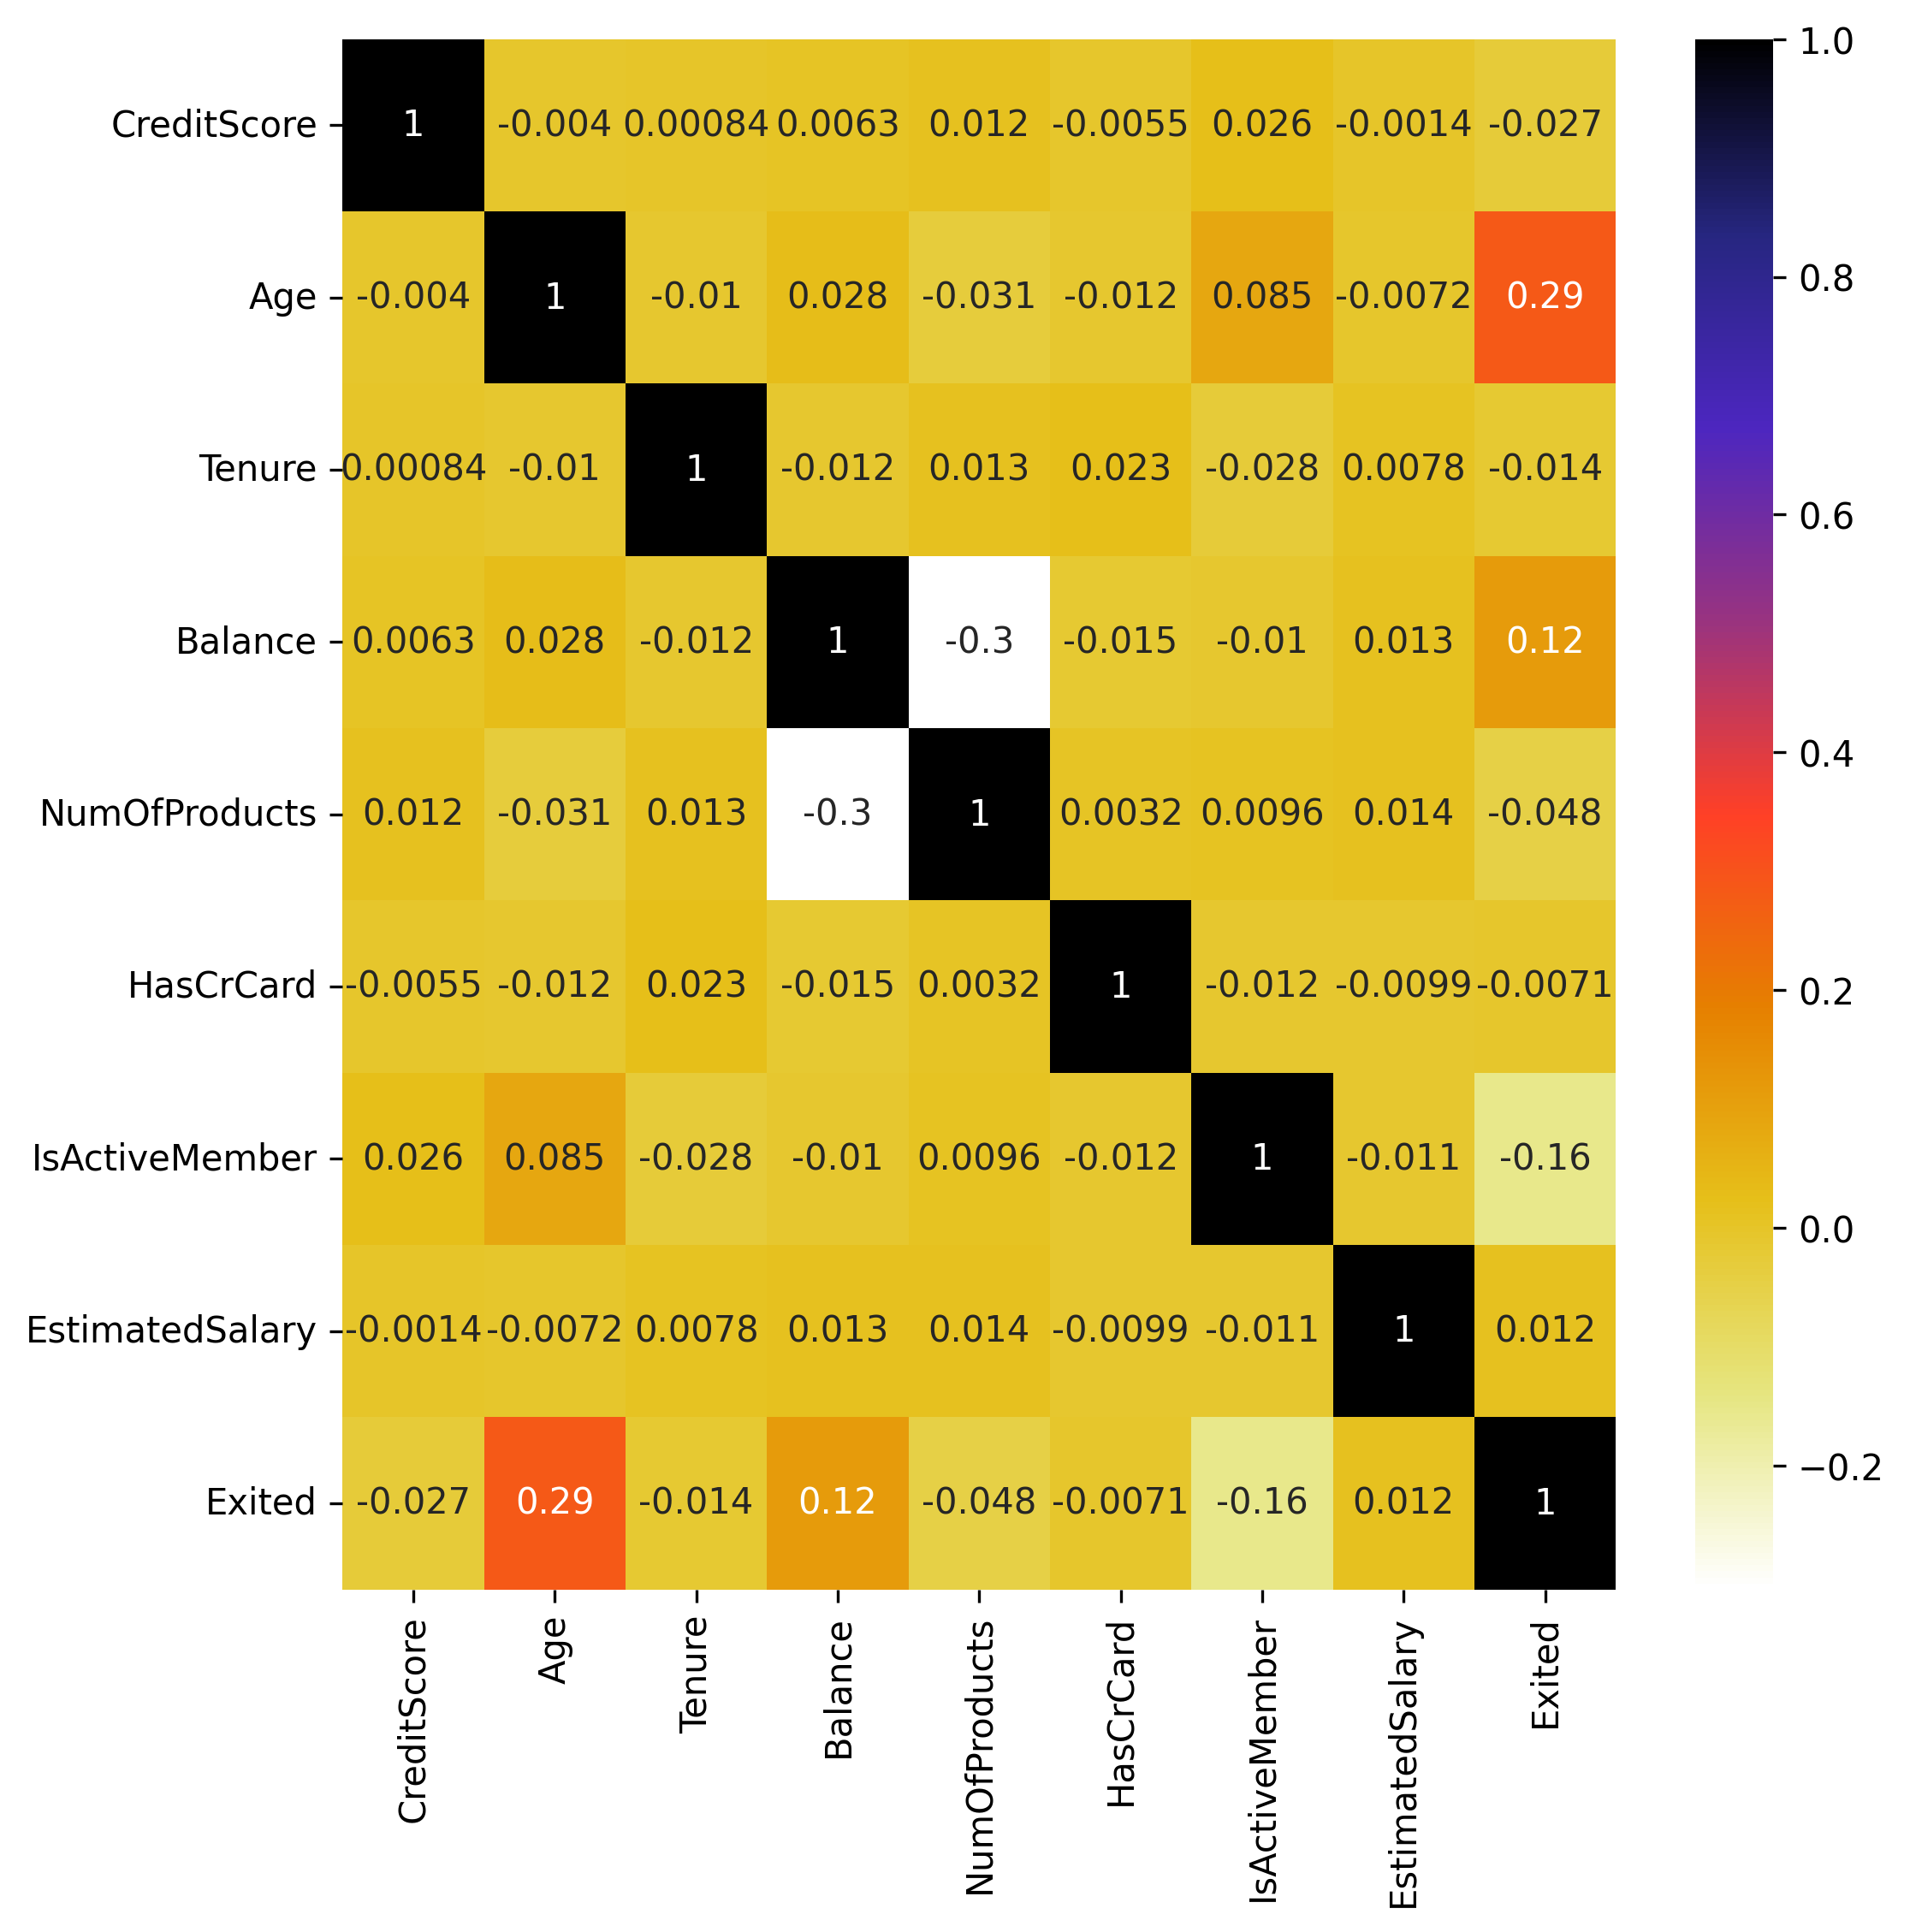

In [17]:
plt.figure(figsize=(8,8), dpi=300)
sns.heatmap(data=df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

# Feature Enginnering

In [18]:
for col in ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']:
    df[col], _ = stats.boxcox(df[col]+1)

In [19]:
df.skew()

CreditScore       -0.025403
Age               -0.002495
Tenure             0.010991
Balance           -0.555956
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary   -0.290537
Exited             1.471611
dtype: float64

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1258.915086,France,Female,2.407725,2,0.000000,1,1,1,5153.410340,1
1,1233.705954,Spain,Female,2.398777,1,28.900279,1,0,1,5552.685844,0
2,993.940871,France,Female,2.407725,8,32.417997,3,1,0,5601.413897,1
3,1443.941075,France,Female,2.380050,1,0.000000,2,0,0,4877.948629,0
4,1800.489366,Spain,Female,2.416415,2,31.065765,1,1,1,4318.726631,0


Outliers present in Credit Score And Age.<br>
So Let's Handle That

In [21]:
quantile1 , quantile3 = np.quantile(df['CreditScore'], [0.25,0.75])
IQR = quantile3 - quantile1
lower_bound = quantile1 - (1.5*IQR)
upper_bound = quantile3 + (1.5*IQR)
median = df['CreditScore'].median()

df.loc[df.CreditScore<lower_bound, 'CreditScore'] = median
df.loc[df.CreditScore>upper_bound, 'CreditScore'] = median

In [22]:
quantile1 , quantile3 = np.quantile(df['Age'], [0.25,0.75])
IQR = quantile3 - quantile1
lower_bound = quantile1 - (1.5*IQR)
upper_bound = quantile3 + (1.5*IQR)
median = df['Age'].median()

df.loc[df.Age<lower_bound, 'Age'] = median
df.loc[df.Age>upper_bound, 'Age'] = median

### Convert Categorial into Numerical

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1258.915086,France,Female,2.407725,2,0.000000,1,1,1,5153.410340,1
1,1233.705954,Spain,Female,2.398777,1,28.900279,1,0,1,5552.685844,0
2,993.940871,France,Female,2.407725,8,32.417997,3,1,0,5601.413897,1
3,1443.941075,France,Female,2.380050,1,0.000000,2,0,0,4877.948629,0
4,1800.489366,Spain,Female,2.416415,2,31.065765,1,1,1,4318.726631,0


In [24]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [25]:
df = pd.get_dummies(columns=['Gender', 'Geography'], data=df)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,1258.915086,2.407725,2,0.000000,1,1,1,5153.410340,1,1,0,1,0,0
1,1233.705954,2.398777,1,28.900279,1,0,1,5552.685844,0,1,0,0,0,1
2,993.940871,2.407725,8,32.417997,3,1,0,5601.413897,1,1,0,1,0,0
3,1443.941075,2.380050,1,0.000000,2,0,0,4877.948629,0,1,0,1,0,0
4,1800.489366,2.416415,2,31.065765,1,1,1,4318.726631,0,1,0,0,0,1


# X & y

In [26]:
X = df.drop(axis=1, columns='Exited')
y = df.Exited

# Feature Selection

In [27]:
from sklearn.feature_selection import SelectKBest, chi2

In [28]:
selectKBest = SelectKBest(score_func=chi2 ,k='all')

In [29]:
selectKBest.fit(X,y)

SelectKBest(k='all', score_func=<function chi2 at 0x7fcbbff13290>)

In [30]:
pd.Series(data=selectKBest.scores_, index=X.columns).sort_values(ascending=True)

HasCrCard               0.150041
Tenure                  3.270538
Age                     3.423702
NumOfProducts           5.055394
Geography_Spain        20.867206
Gender_Male            51.539926
Geography_France       54.923705
Gender_Female          61.909174
IsActiveMember        118.199414
CreditScore           144.078093
Geography_Germany     225.464426
EstimatedSalary      1293.706726
Balance              1682.935736
dtype: float64

# Splitting

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train , x_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.2)

In [33]:
x_train.shape

(8000, 13)

In [34]:
y_train.value_counts()

0    6340
1    1660
Name: Exited, dtype: int64

# OverSampling

In [35]:
from imblearn.combine import SMOTETomek

In [36]:
Smot = SMOTETomek(sampling_strategy=1)

In [37]:
x_train, y_train = Smot.fit_resample(x_train, y_train)

In [38]:
x_train.shape

(11468, 13)

In [39]:
y_train.value_counts()

0    5734
1    5734
Name: Exited, dtype: int64

# Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scale = StandardScaler()

In [42]:
scale.fit(x_train)

StandardScaler()

In [43]:
x_train = scale.transform(x_train)
x_test = scale.transform(x_test)

# Model

In [44]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[23:10:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8585
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1700
           1       0.52      0.66      0.58       300

    accuracy                           0.86      2000
   macro avg       0.73      0.78      0.75      2000
weighted avg       0.87      0.86      0.86      2000



<AxesSubplot:>

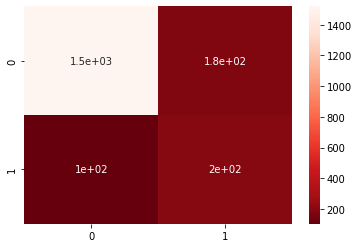

In [46]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
pred_xgb = xgb.predict(x_test)
print(accuracy_score(pred_xgb, y_test))
print(classification_report(pred_xgb, y_test))
sns.heatmap(data=confusion_matrix(pred_xgb, y_test), cmap = plt.cm.Reds_r, annot=True)

0.8525
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1696
           1       0.51      0.63      0.57       304

    accuracy                           0.85      2000
   macro avg       0.72      0.76      0.74      2000
weighted avg       0.87      0.85      0.86      2000



<AxesSubplot:>

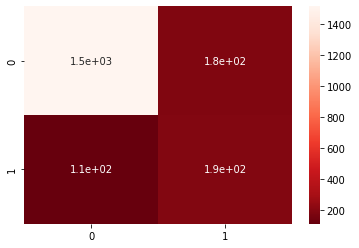

In [47]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print(accuracy_score(pred_rfc, y_test))
print(classification_report(pred_rfc, y_test))
sns.heatmap(data=confusion_matrix(pred_rfc, y_test), cmap = plt.cm.Reds_r, annot=True)

0.8515
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1712
           1       0.49      0.64      0.55       288

    accuracy                           0.85      2000
   macro avg       0.71      0.76      0.73      2000
weighted avg       0.87      0.85      0.86      2000



<AxesSubplot:>

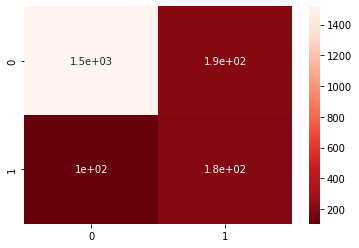

In [48]:
svc = SVC(probability=True)
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print(accuracy_score(pred_svc, y_test))
print(classification_report(pred_svc, y_test))
sns.heatmap(data=confusion_matrix(pred_svc, y_test), cmap = plt.cm.Reds_r, annot=True)

0.81
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1707
           1       0.38      0.49      0.43       293

    accuracy                           0.81      2000
   macro avg       0.65      0.68      0.66      2000
weighted avg       0.83      0.81      0.82      2000



<AxesSubplot:>

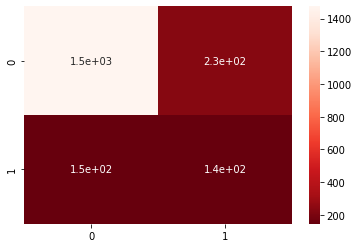

In [49]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)
print(accuracy_score(pred_lr, y_test))
print(classification_report(pred_lr, y_test))
sns.heatmap(data=confusion_matrix(pred_lr, y_test), cmap = plt.cm.Reds_r, annot=True)

#### RANDOM FOREST CLASSIFIER HAS BETTER PRECISION AND F1-SCORE AS COMPARED TO XGBOOST

# ROC AUC CURVE

In [50]:
from sklearn.metrics import roc_auc_score, roc_curve

In [51]:
pred_lr = lr.predict_proba(x_test)
pred_rfc = rfc.predict_proba(x_test)
pred_xgb = xgb.predict_proba(x_test)
pred_svc = svc.predict_proba(x_test)

In [52]:
print(f'Logistics Regression : {roc_auc_score(y_test, pred_lr[:,1])}')
print(f'RFC : {roc_auc_score(y_test, pred_rfc[:,1])}')
print(f'XGB : {roc_auc_score(y_test, pred_xgb[:,1])}')
print(f'SVC : {roc_auc_score(y_test, pred_svc[:,1])}')

Logistics Regression : 0.7497609790298936
RFC : 0.8444279921748212
XGB : 0.8384267272023024
SVC : 0.8217156884375956


In [53]:
fpr_lr, tpr_lr , threshold_lr = roc_curve(y_test, pred_lr[:,1])
fpr_rfc, tpr_rfc , threshold_rfc = roc_curve(y_test, pred_rfc[:,1])
fpr_xgb, tpr_xgb , threshold_xgb = roc_curve(y_test, pred_xgb[:,1])
fpr_svc, tpr_svc , threshold_svc = roc_curve(y_test, pred_svc[:,1])

Text(0, 0.5, 'TPR')

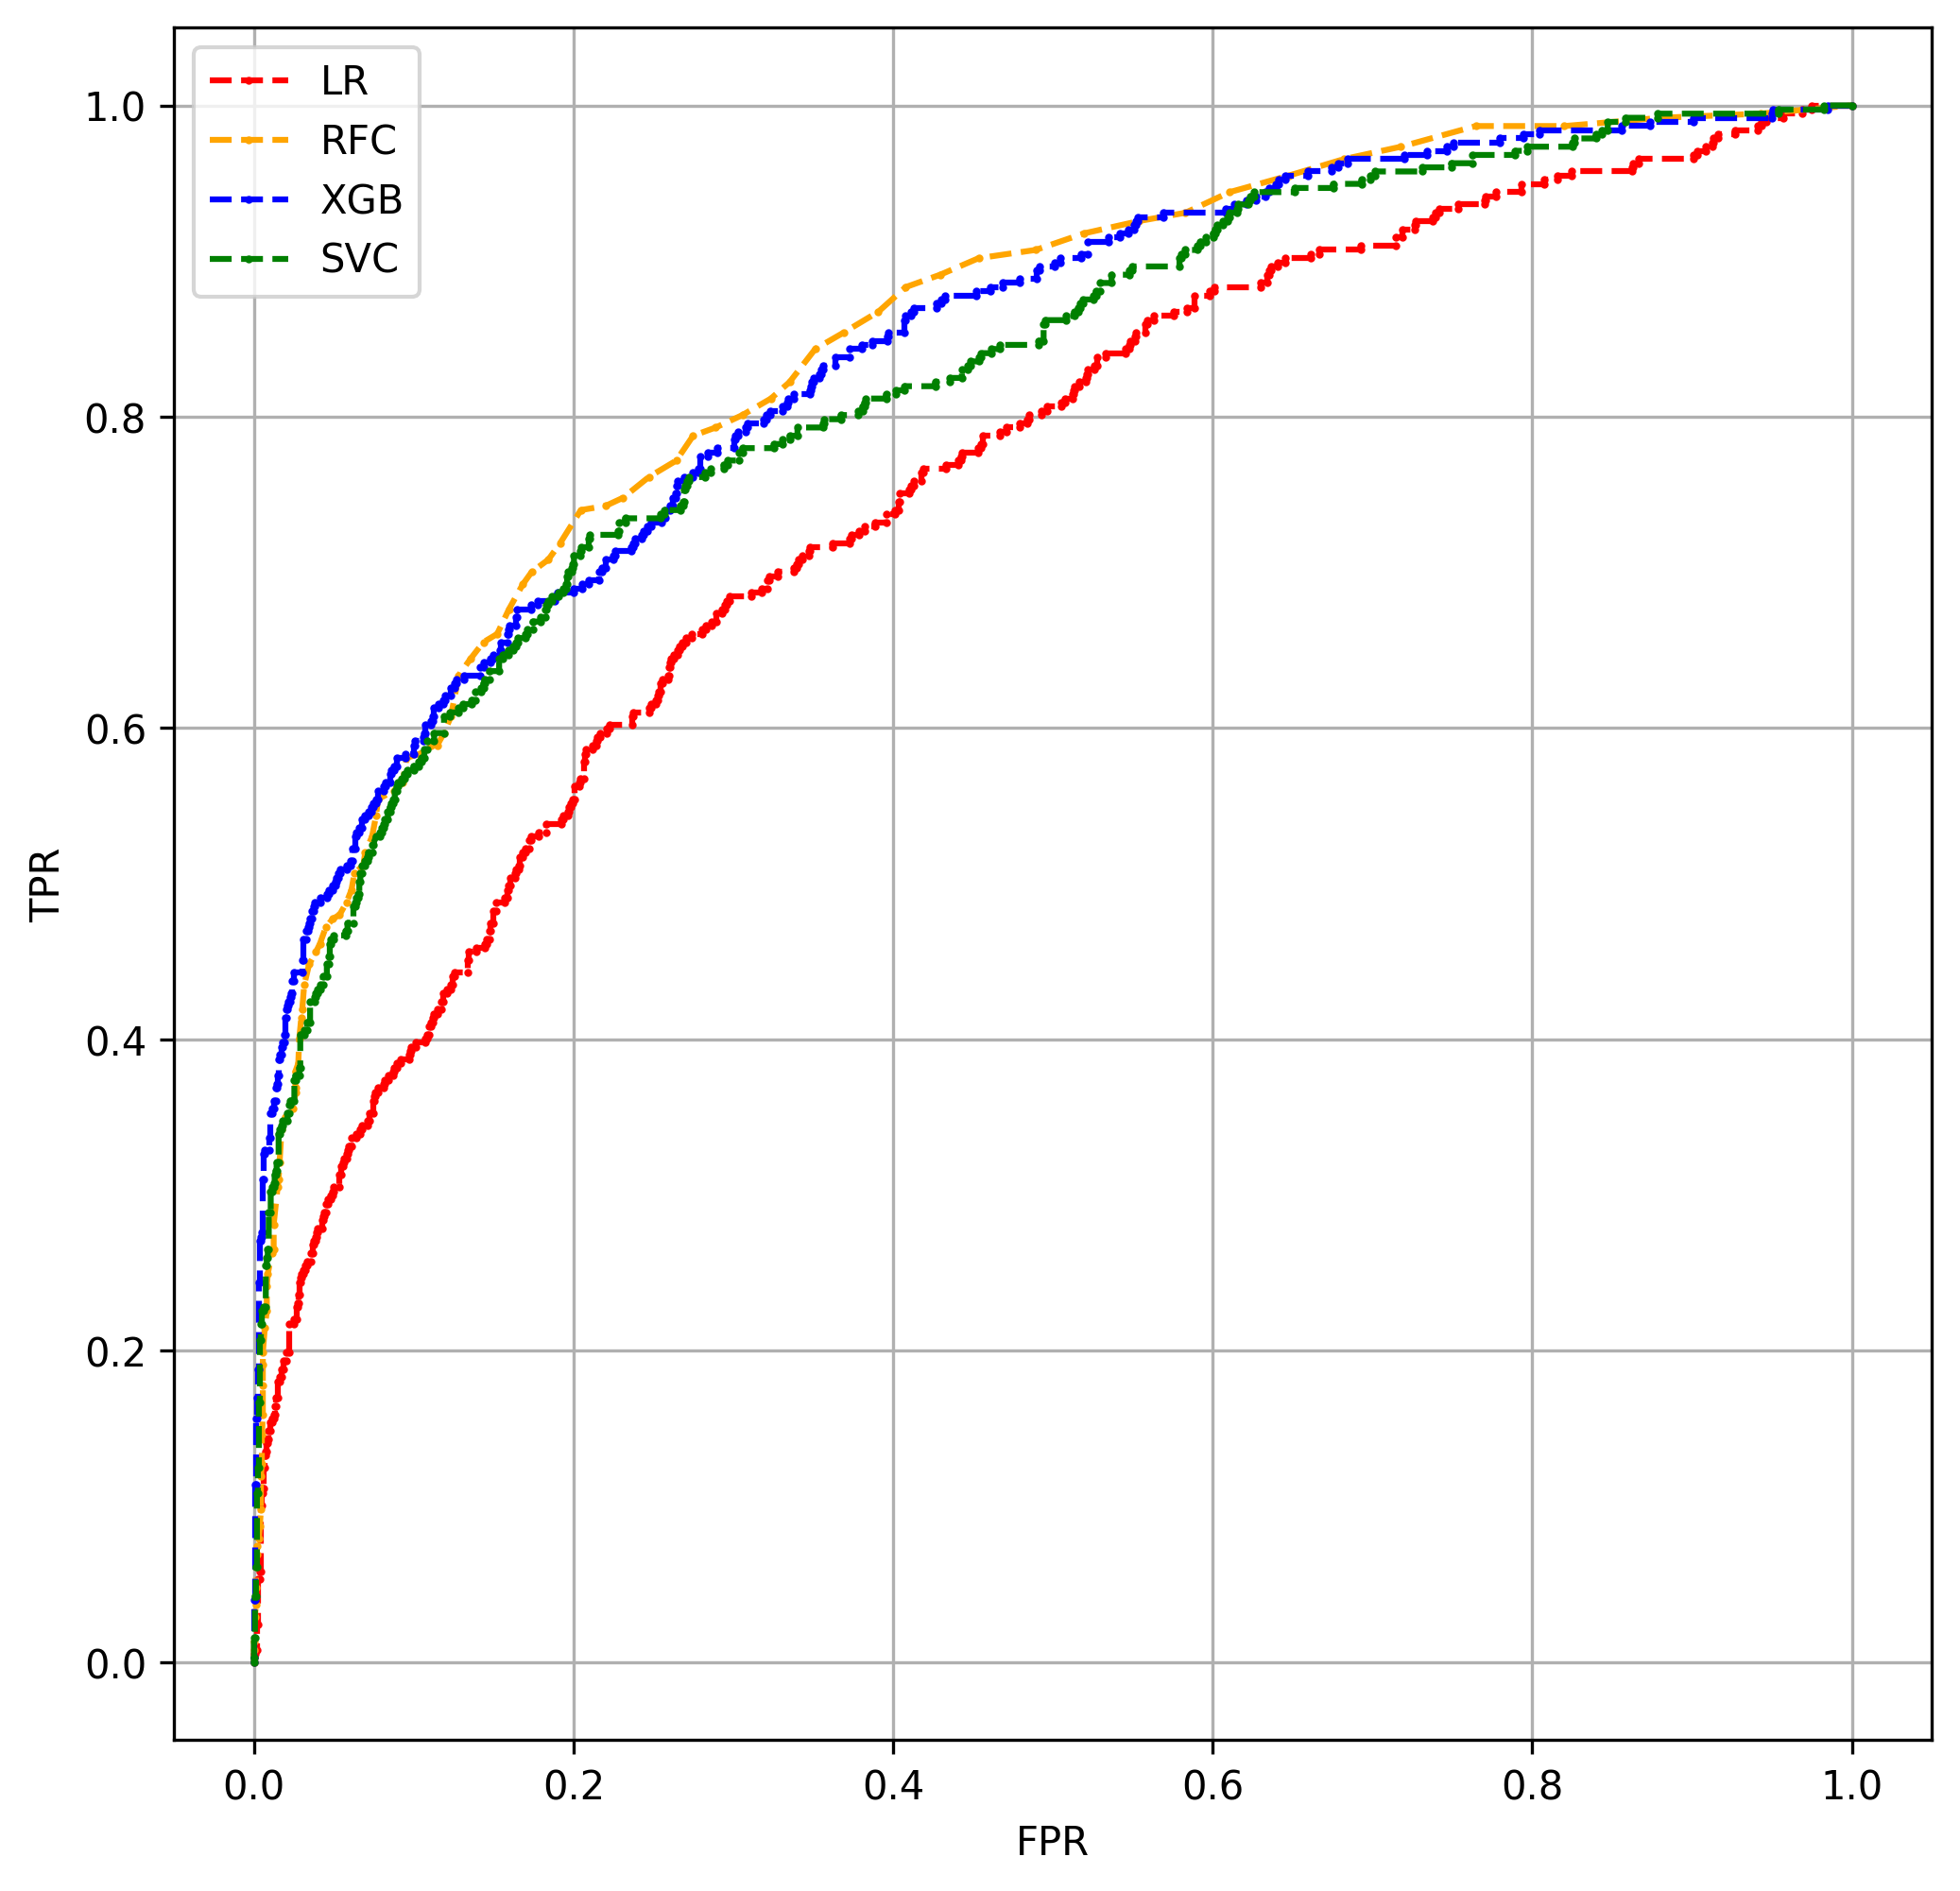

In [54]:
plt.figure(figsize=(8,8), dpi=300)
plt.grid()

plt.plot(fpr_lr, tpr_lr, color='red', marker='o', linestyle='dashed', linewidth=1.5, markersize=1, label='LR')
plt.plot(fpr_rfc, tpr_rfc, color='orange', marker='o', linestyle='dashed', linewidth=1.5, markersize=1, label='RFC')
plt.plot(fpr_xgb, tpr_xgb, color='blue', marker='o', linestyle='dashed', linewidth=1.5, markersize=1, label='XGB')
plt.plot(fpr_svc, tpr_svc, color='green', marker='o', linestyle='dashed', linewidth=1.5, markersize=1, label='SVC')

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")

### Finding Threshold Value for RFC and XGB

Threshold Value for RFC is : 0.24<br>
Threshold Value for XGB is : 0.11006622761487961

So I have used both down there but I felt like in RFC threshold should be 0.4.See Graphs for clear understanding.

In [55]:
g_mean_rfc = fpr_rfc*(1-tpr_rfc)
g_mean_xgb = fpr_xgb*(1-tpr_xgb)

In [56]:
index_rfc = np.argmax(g_mean_rfc)
index_xgb = np.argmax(g_mean_xgb)
print(f'Threshold Value for RFC is : {threshold_rfc[index_rfc]}')
print(f'Threshold Value for XGB is : {threshold_xgb[index_xgb]}')

Threshold Value for RFC is : 0.2
Threshold Value for XGB is : 0.15633778274059296


Text(0, 0.5, 'TPR')

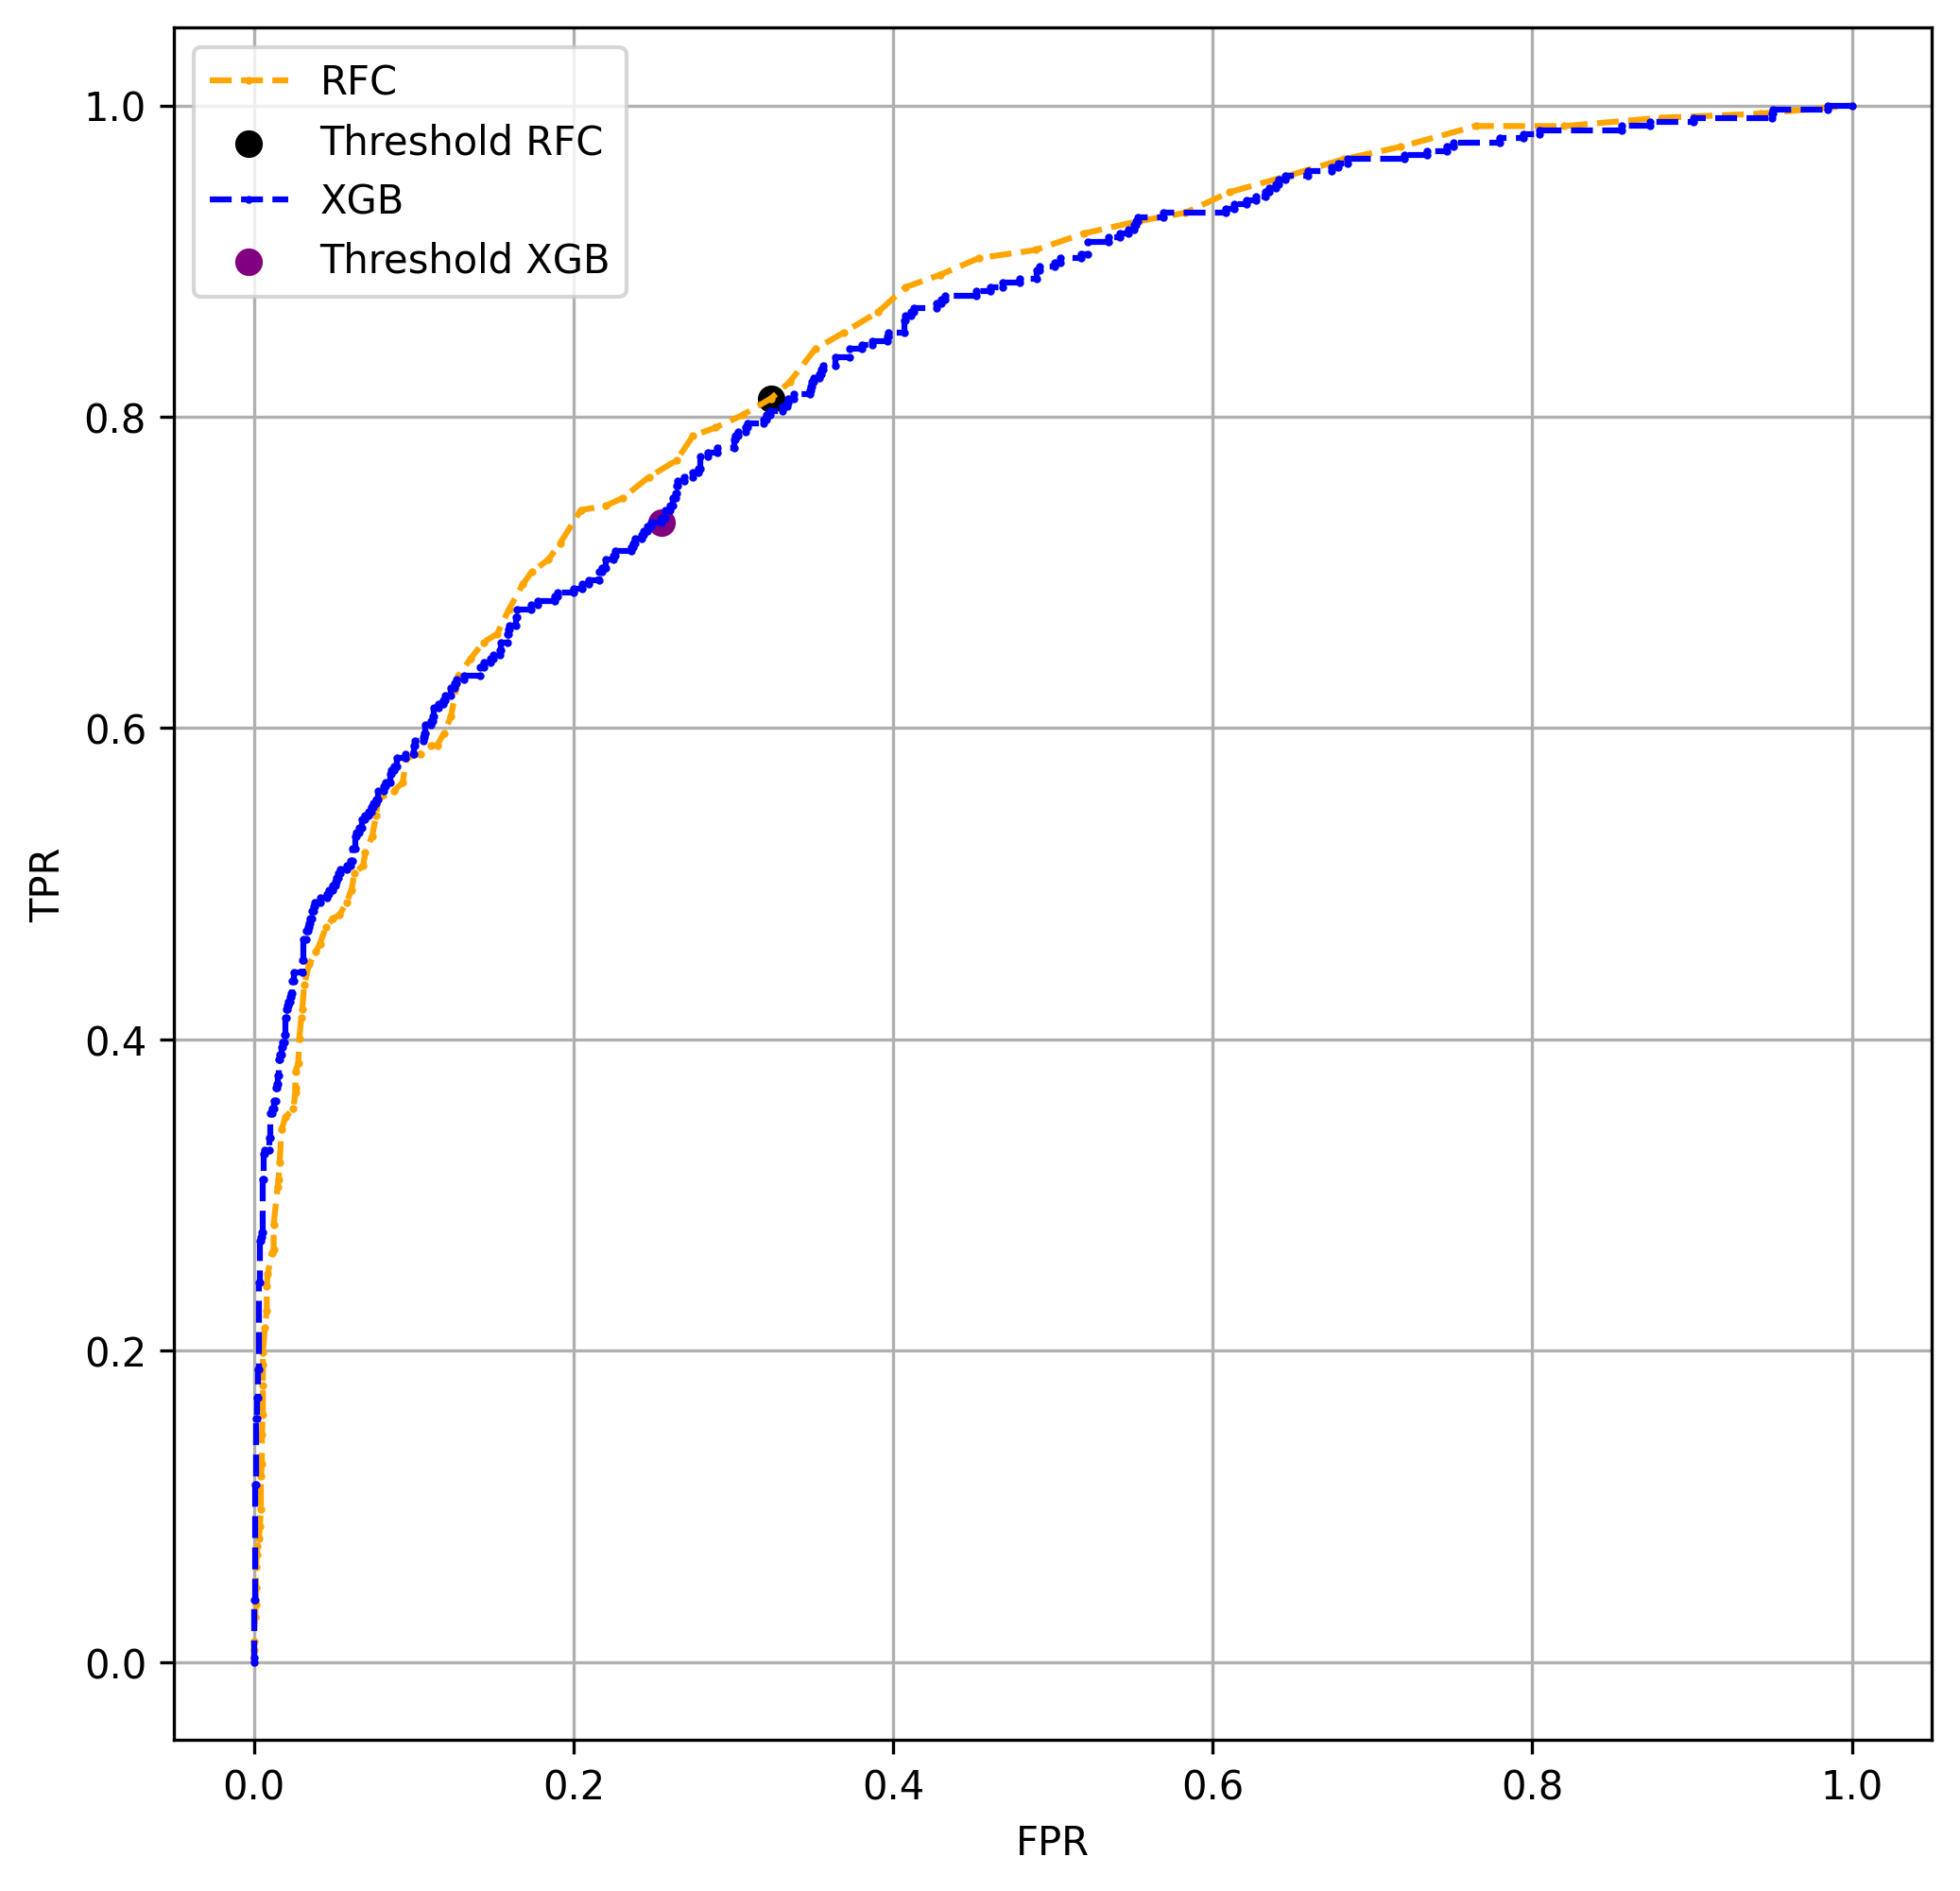

In [58]:
plt.figure(figsize=(8,8), dpi=300)
plt.grid()


plt.plot(fpr_rfc, tpr_rfc, color='orange', marker='o', linestyle='dashed', linewidth=1.5, markersize=1, label='RFC')
plt.scatter(fpr_rfc[index_rfc], tpr_rfc[index_rfc], color='black', label='Threshold RFC')

plt.plot(fpr_xgb, tpr_xgb, color='blue', marker='o', linestyle='dashed', linewidth=1.5, markersize=1, label='XGB')
plt.scatter(fpr_xgb[index_xgb], tpr_xgb[index_xgb], color='purple', label='Threshold XGB')

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")

0.8325
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1598
           1       0.59      0.55      0.57       402

    accuracy                           0.83      2000
   macro avg       0.74      0.73      0.73      2000
weighted avg       0.83      0.83      0.83      2000



<AxesSubplot:>

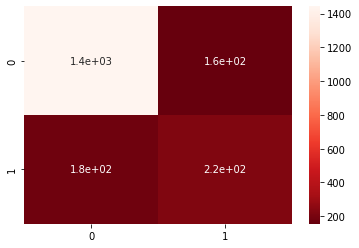

In [59]:
pred__test = np.where(rfc.predict_proba(x_test)[:, 1]>0.4,1,0)
print(accuracy_score(pred__test, y_test))
print(classification_report(pred__test, y_test))
sns.heatmap(data=confusion_matrix(pred__test, y_test), cmap = plt.cm.Reds_r, annot=True)

0.7545
              precision    recall  f1-score   support

           0       0.75      0.93      0.83      1312
           1       0.76      0.42      0.54       688

    accuracy                           0.75      2000
   macro avg       0.76      0.67      0.69      2000
weighted avg       0.76      0.75      0.73      2000



<AxesSubplot:>

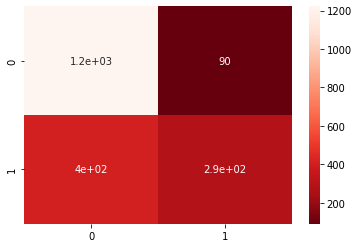

In [60]:
pred__test = np.where(rfc.predict_proba(x_test)[:, 1]>0.24,1,0)
print(accuracy_score(pred__test, y_test))
print(classification_report(pred__test, y_test))
sns.heatmap(data=confusion_matrix(pred__test, y_test), cmap = plt.cm.Reds_r, annot=True)

0.6965
              precision    recall  f1-score   support

           0       0.67      0.94      0.78      1164
           1       0.80      0.36      0.50       836

    accuracy                           0.70      2000
   macro avg       0.74      0.65      0.64      2000
weighted avg       0.73      0.70      0.66      2000



<AxesSubplot:>

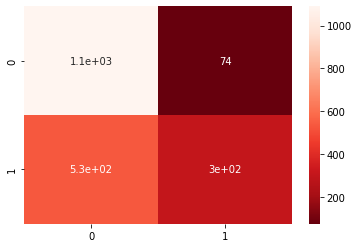

In [61]:
pred__test_xgb = np.where(xgb.predict_proba(x_test)[:, 1]>0.110,1,0)
print(accuracy_score(pred__test_xgb, y_test))
print(classification_report(pred__test_xgb, y_test))
sns.heatmap(data=confusion_matrix(pred__test_xgb, y_test), cmap = plt.cm.Reds_r, annot=True)

# Randomized Search CV

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
rfc = RandomForestClassifier()

In [68]:
randomSearchCV = RandomizedSearchCV(estimator=rfc, param_distributions={'n_estimators':[100,200,300,400,500,600,700,800,900,1000],
                                        'criterion':['gini','entropy'], 'min_samples_split':[2,4,6,8,10],
                                        'min_samples_leaf':[1,2,3,4,5,6], 'max_features':['auto','sqrt','log2']},
                                        n_jobs=-1, verbose=2, cv=3, n_iter=10)

In [69]:
randomSearchCV.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   verbose=2)

In [71]:
randomSearchCV.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'criterion': 'entropy'}

In [72]:
rfc = RandomForestClassifier(n_estimators= 1000,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'log2',
 criterion= 'entropy')

In [73]:
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=1000)

In [74]:
pred = rfc.predict(x_test)
print(accuracy_score(pred, y_test))
print(classification_report(pred, y_test))

0.8515
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1696
           1       0.51      0.63      0.56       304

    accuracy                           0.85      2000
   macro avg       0.72      0.76      0.74      2000
weighted avg       0.87      0.85      0.86      2000

